# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `6` | `Questions`

> Hi, Team 👋

> The purpose of the current exercise problem sets is to consolidate and expand the understanding of algorithmic trading tool kits that you have developed in the course.

> Building on what you have learned thus far, these problem sets will ask you to create trading strategies, capitalizing on commonly used technical indicators.

> Please submit your answers via the submission portal at eLearn. Again, it would be a good practice to attempt to answer these questions within the designated time limit.

> As with the previous exercise problem sets, the questions are written in such a way that helps advance your learning, rather than testing you.

> Enjoy🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf
import datetime
yf.pdr_override()

> Let's set some print option.

In [6]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a strategy based on one kind of momentum strategy called the `Moving Average Convergence Divergence` (MACD) crossover.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Apple (AAPL) as our security of interest, over the three-year period of 2015 through 2017.

#### Moving Average Convergence Divergence (`MACD`) is a lagging, trend-following momentum indicator reflecting the relationship between two moving averages of stock prices.

#### The strategy utilizes two indicators, the MACD and the MACD signal line:

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.

### <font color = green> NOTE: The MACD crossover strategy is defined as:

- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [7]:
#Extract the data using yfinance
AAPL = \
    yf.download('AAPL',
                start = dt.datetime(2015,1,1),
                end = dt.datetime(2017,12,31))

[*********************100%%**********************]  1 of 1 completed


In [8]:
AAPL = \
    AAPL.drop(['Open','High','Low','Close','Volume'], axis=1)

In [16]:
AAPL["12day"] =\
(
    AAPL["Adj Close"]
    .ewm(span=12,
        min_periods=12)
    .mean()
)

AAPL["26day"] =\
(
    AAPL["Adj Close"]
    .ewm(span=26,
        min_periods=26)
    .mean()
)

AAPL["MACD"] =\
(
    AAPL["12day"]-AAPL["26day"]
)

AAPL["Signal_Line"] =\
(
    AAPL["MACD"]
    .ewm(span=9,
        min_periods=9)
    .mean()
)

AAPL["Signal"] = 0

AAPL["Signal"] =\
    (
    np
    .where(AAPL["MACD"] > AAPL["Signal_Line"],
           1, -1)
    )

AAPL["Return"] = \
    np.log(AAPL['Adj Close'] / AAPL['Adj Close'].shift(1))

AAPL['STRATEGY'] = \
        AAPL['Signal'].shift(1) * AAPL['Return']


AAPL = AAPL.dropna()




In [17]:
AAPL

,Adj Close,12day,26day,MACD,Signal_Line,Signal,Return,STRATEGY
Date,,,,,,,,
2015-04-09,28.471508,28.291749,28.332499,-0.040750,-0.082719,1,0.007614,-0.007614
2015-04-10,28.592995,28.338229,28.353195,-0.014966,-0.067538,1,0.004258,0.004258
2015-04-13,28.536751,28.368845,28.367700,0.001146,-0.052510,1,-0.001969,-0.001969
2015-04-14,28.413017,28.375655,28.371263,0.004392,-0.040290,1,-0.004345,-0.004345
2015-04-15,28.520996,28.398055,28.382984,0.015071,-0.028574,1,0.003793,0.003793
...,...,...,...,...,...,...,...,...
2017-12-22,41.427483,41.087593,40.708549,0.379044,0.348634,1,0.000000,0.000000
2017-12-26,40.376465,40.978189,40.683950,0.294238,0.337755,-1,-0.025697,-0.025697
2017-12-27,40.383579,40.886710,40.661701,0.225009,0.315206,-1,0.000176,-0.000176


<Axes: xlabel='Date'>

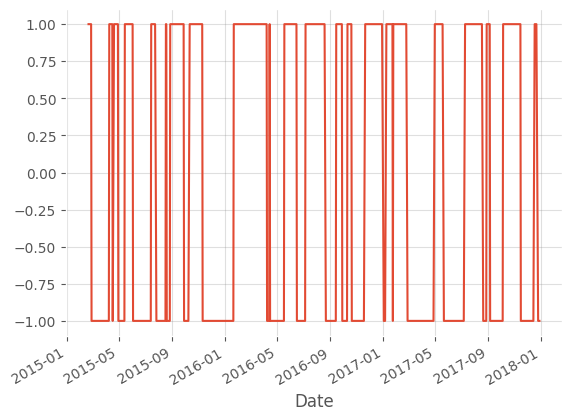

In [13]:
AAPL["Signal"].plot()

### <font color = red> Answer 1 is presented in the cell below: </font>

<Axes: xlabel='Date'>

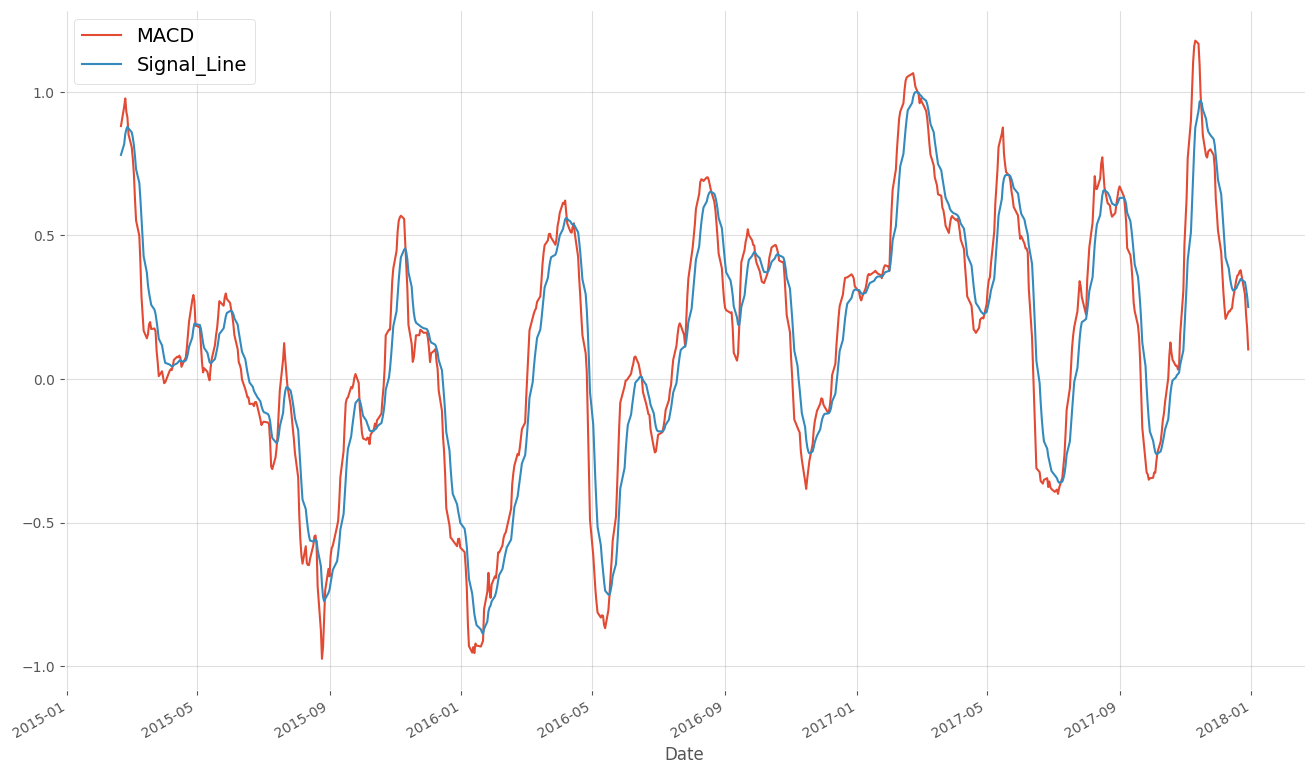

In [14]:
AAPL[["MACD","Signal_Line"]].plot(figsize = (16,10))

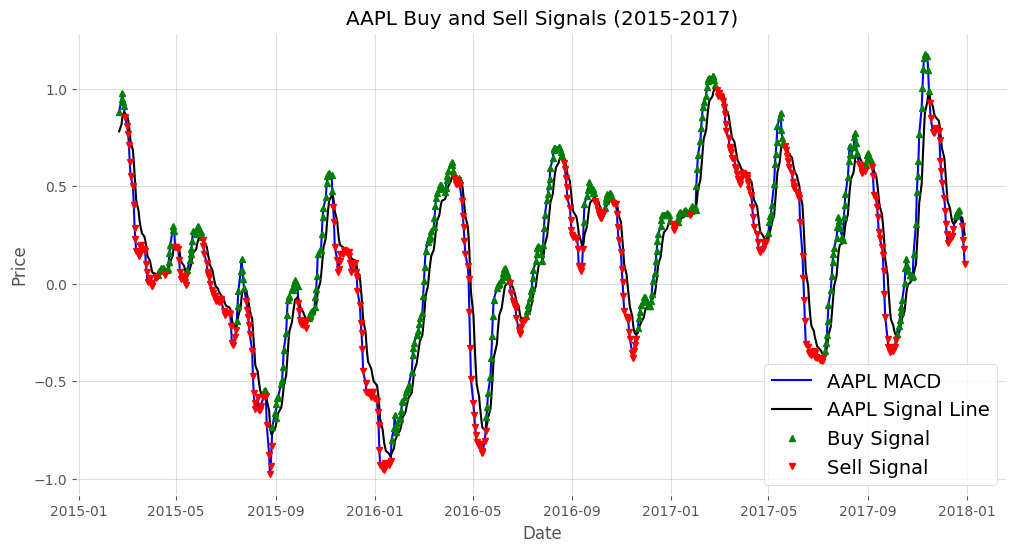

In [15]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the MACD
ax.plot(AAPL.index, AAPL['MACD'], label='AAPL MACD', color='blue')

#Plot the signal line
ax.plot(AAPL.index, AAPL['Signal_Line'], label='AAPL Signal Line', color='black')

# Plot buy signals as green upward triangles
ax.plot(AAPL[AAPL['Signal'] == 1].index, AAPL[AAPL['Signal'] == 1]['MACD'], '^', markersize=5, color='g', label='Buy Signal')

# Plot sell signals as red downward triangles
ax.plot(AAPL[AAPL['Signal'] == -1].index, AAPL[AAPL['Signal'] == -1]['MACD'], 'v', markersize=5, color='r', label='Sell Signal')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('AAPL Buy and Sell Signals (2015-2017)')

# Add a legend
ax.legend()

# Show the plot
plt.show()

### <font color = blue> 👉 Question 2</font>. Let’s suppose that you started from a $100,000 capital base for the given security.

### Given a $5 fixed commission fee per trade, how much in cumulative returns could you have had as a result of the MACD crossover strategy?

### Below are the lines of code that lead to an answer:

In [20]:
def CalculateCashReturn(dataframe,capital):
    
    #Calculate cummulative return --> only for our comparison with strategy returns
    dataframe['CUMULATIVE RETURN'] = \
        dataframe['Return'].cumsum().apply(np.exp)
    
    #Calculate cummulative strategy return
    dataframe['CUMULATIVE STRATEGY'] = \
        dataframe['STRATEGY'].cumsum().apply(np.exp)
    
    #Final cash return
    capital = \
        capital * dataframe['CUMULATIVE STRATEGY'][-1]

    return capital

In [21]:
CalculateCashReturn(AAPL,100000)

C:\Users\bryan\AppData\Local\Temp\ipykernel_12740\2255314121.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  capital * dataframe['CUMULATIVE STRATEGY'][-1]


192176.11325676073

In [9]:
# Define starting capital and fixed commission fee
starting_capital = 100000
commission_fee = 5

# Initialize variables for tracking capital and positions
capital = starting_capital
position = 0  # Number of shares held
buy_price = None

# Calculate returns
returns = []

for index,row in AAPL.iterrows():
    if row["Signal"] == 1:
        #BUY SIGNAL
        if position == 0:
            # Calculate the number of shares you can buy with available capital
            shares_to_buy = (capital - commission_fee) // row['Adj Close']
            if shares_to_buy > 0:
                buy_price = row['Adj Close']
                position += shares_to_buy
                capital -= (shares_to_buy * buy_price) + commission_fee
    
    elif row['Signal'] == -1:
        # Sell signal
        if position > 0:
            capital += (position * row['Adj Close']) - commission_fee
            position = 0
            
    # Calculate current portfolio value
    portfolio_value = capital + (position * row['Adj Close'])
    returns.append(portfolio_value)

# Calculate cumulative returns
cumulative_returns = [(r - starting_capital) / starting_capital * 100 for r in returns]

print("Cumulative Returns as a Result of MACD Crossover Strategy:")
print(cumulative_returns[-1])  # Final cumulative returns    
        


Cumulative Returns as a Result of MACD Crossover Strategy:
58.92279950332642


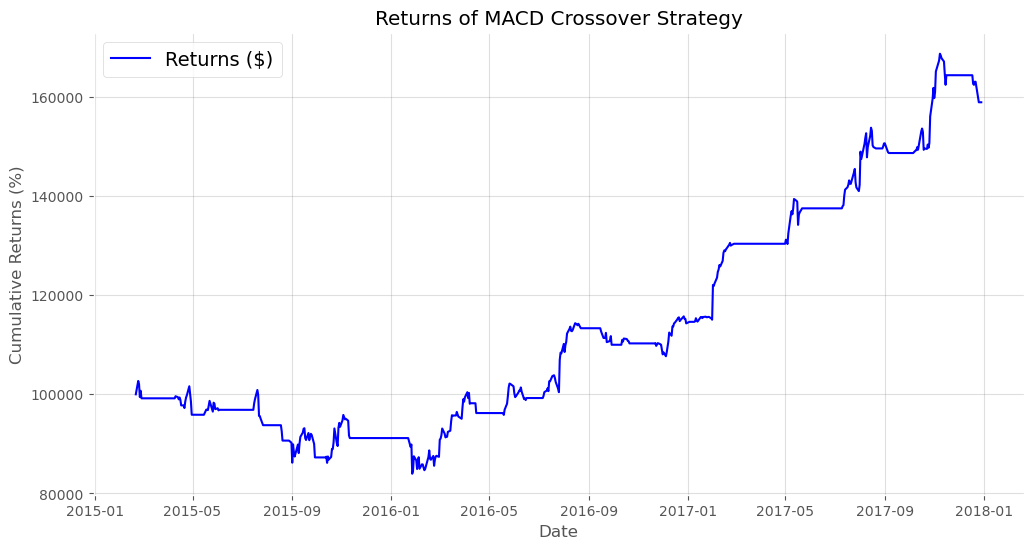

In [10]:
# Create a plot for cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(AAPL.index, returns, label='Returns ($)', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.title('Returns of MACD Crossover Strategy')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

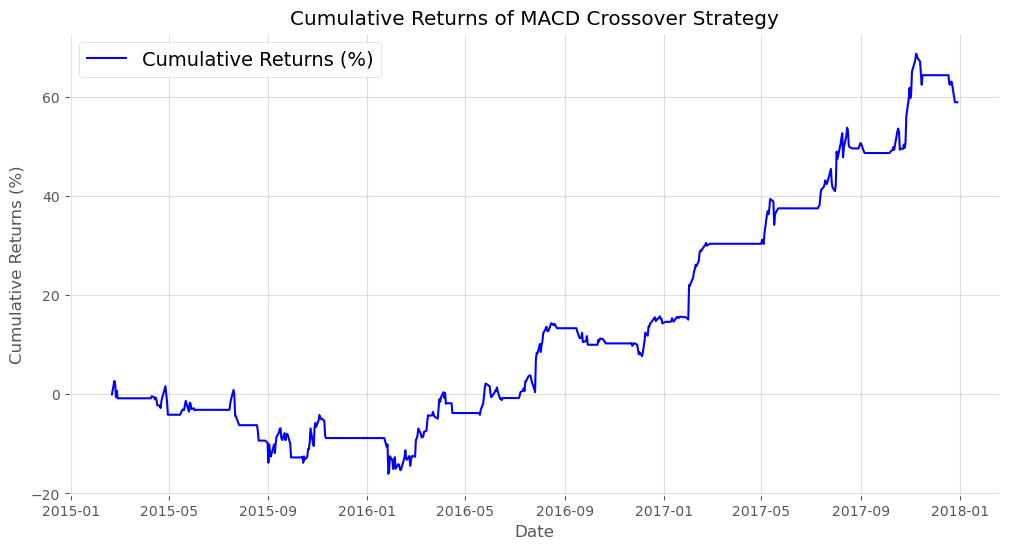

In [11]:
# Create a plot for cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(AAPL.index, cumulative_returns, label='Cumulative Returns (%)', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.title('Cumulative Returns of MACD Crossover Strategy')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### <font color = red> Answer 2 </font>

    The answer is _____58.92285721588135_______ % .

### <font color = blue> 👉 Question 3</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [12]:
AAPL["returns"] = returns

AAPL["MAX_returns"] = AAPL["returns"].cummax()

<Axes: xlabel='Date'>

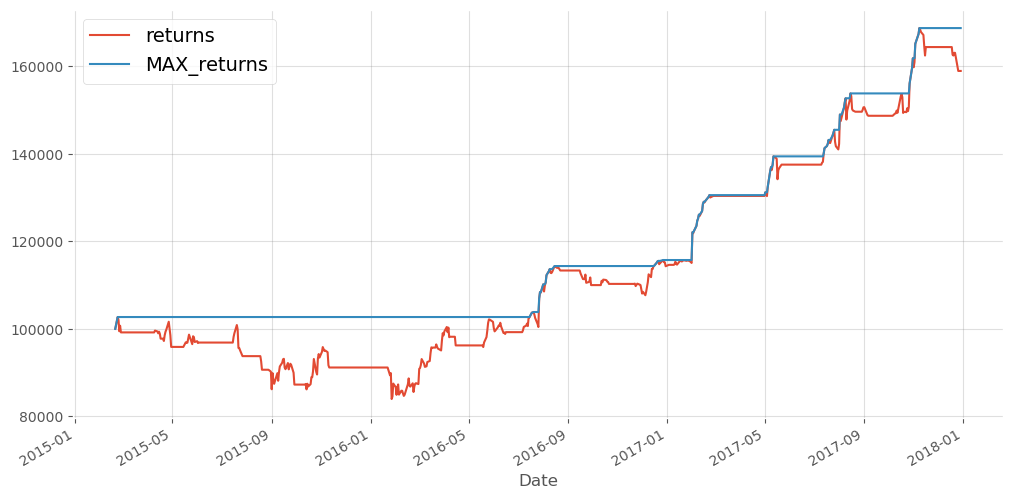

In [13]:
AAPL[["returns","MAX_returns"]].plot(figsize = [12,6])

In [14]:
drawdown = (AAPL["returns"]/AAPL["MAX_returns"]) - 1
AAPL["drawdown"] = drawdown 

In [15]:
periods =\
(
    drawdown[drawdown == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown[drawdown == 0].index[   : -1].to_pydatetime()
)
worst_periods = sorted(periods)[-5:]
worst_periods

[datetime.timedelta(days=62),
 datetime.timedelta(days=69),
 datetime.timedelta(days=73),
 datetime.timedelta(days=123),
 datetime.timedelta(days=511)]

<Axes: xlabel='Date'>

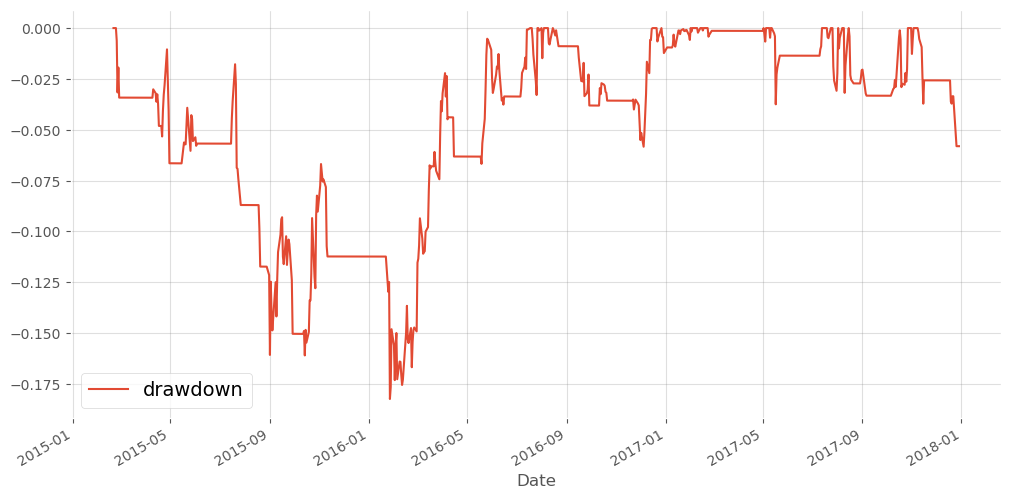

In [16]:
AAPL[["drawdown"]].plot(figsize=[12,6])

In [17]:
drawdown = []
drawdown_period = []
start_date = None
dd = 0

for date, i in zip(AAPL.index, AAPL["drawdown"]):
    if i < 0:
        if start_date is None:
            start_date = date
            #check for monday
            if start_date.weekday() == 0:
                start_date = start_date -  datetime.timedelta(days=3)
            else:
                start_date = start_date -  datetime.timedelta(days=1)
        if i < dd:
            dd = i
    elif i == 0:
        if start_date is not None:
            end_date = date
            drawdown_period.append((end_date-start_date).days)
            drawdown.append(dd)
            start_date = None
            dd = 0
            
if start_date is not None:
    end_date = AAPL.index[-1]  # Use the last date in the data
    drawdown_period.append((end_date - start_date).days)
    drawdown.append(dd)
    

            
drawdowns = zip(drawdown_period,drawdown)
print(sorted(tuple(drawdowns))[-5:])

[(62, -0.03747406916871021), (69, -0.004229745617747915), (73, -0.03326133734779835), (123, -0.05831880473429529), (511, -0.1823486343638434)]


### <font color = red> Answer 3 </font>

    The Worst drawdown period     : Net drawdown _____-0.18234833842727827_______ % | Duration ____511________ Days
    
    The 2nd worst drawdown period : Net drawdown ______ -0.0583189034191568______ % | Duration ______123______ Days
     
    The 3rd worst drawdown period : Net drawdown _____-0.033260995137950555_______ % | Duration ______73______ Days
         
    The 4th worst drawdown period : Net drawdown ______-0.0042297422343764435______ % | Duration _______69_____ Days
    
    The 5th worst drawdown period : Net drawdown ____-0.03747414872890298________ % | Duration _______62_____ Days

### <font color = blue> 👉 Question 4</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [18]:
# Extract the year from the date index
AAPL['Year'] = AAPL.index.year

# Calculate annual returns for each year
annual_returns = (AAPL.groupby('Year')['returns'].last()/AAPL.groupby('Year')['returns'].first())*100

# Calculate the average annual return
average_annual_return = annual_returns.mean()

# Determine which years performed better or worse than the average
better_than_average_years = annual_returns[annual_returns > average_annual_return]
worse_than_average_years = annual_returns[annual_returns < average_annual_return]

print("Annual Returns:")
print(annual_returns)
print("\nAverage Annual Return:", average_annual_return)
print("\nYears with Better Than Average Returns:")
print(better_than_average_years)
print("\nYears with Less Than Average Returns:")
print(worse_than_average_years)

Annual Returns:
Year
2015     91.170798
2016    125.375560
2017    138.650871
Name: returns, dtype: float64

Average Annual Return: 118.39907630006807

Years with Better Than Average Returns:
Year
2016    125.375560
2017    138.650871
Name: returns, dtype: float64

Years with Less Than Average Returns:
Year
2015    91.170798
Name: returns, dtype: float64


In [19]:
annual_returns

Year
2015     91.170798
2016    125.375560
2017    138.650871
Name: returns, dtype: float64

### <font color = red> Answer 4 </font>

    Below average year(s) : _____2015_______ 
    
    Above average year(s) : ______2016,2017______ 
     

###  <font color = blue> 👉 Question 5. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [20]:
AAPL['daily_returns']=AAPL['returns']-AAPL['returns'].shift(1)
sharpe = np.sqrt(253) * AAPL['daily_returns'].mean()/AAPL['daily_returns'].std()
sharpe

1.222944701830105

In [24]:
Sharpe_AAPL = \
(
    np.sqrt(253) * (AAPL['STRATEGY'].mean() / AAPL['STRATEGY'].std()
                    )
)
Sharpe_AAPL

1.067174279319452

In [22]:
AAPL

,Adj Close,12day,26day,MACD,Signal_Line,Signal,Return,STRATEGY,CUMULATIVE RETURN,CUMULATIVE STRATEGY
Date,,,,,,,,,,
2015-04-09,28.471508,28.291749,28.332499,-0.040750,-0.082719,1,0.007614,-0.007614,1.007643,0.992415
2015-04-10,28.592995,28.338229,28.353195,-0.014966,-0.067538,1,0.004258,0.004258,1.011943,0.996649
2015-04-13,28.536751,28.368845,28.367700,0.001146,-0.052510,1,-0.001969,-0.001969,1.009952,0.994689
2015-04-14,28.413017,28.375655,28.371263,0.004392,-0.040290,1,-0.004345,-0.004345,1.005573,0.990376
2015-04-15,28.520996,28.398055,28.382984,0.015071,-0.028574,1,0.003793,0.003793,1.009395,0.994140
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,41.427483,41.087593,40.708549,0.379044,0.348634,1,0.000000,0.000000,1.466172,1.956295
2017-12-26,40.376465,40.978189,40.683950,0.294238,0.337755,-1,-0.025697,-0.025697,1.428975,1.906664
2017-12-27,40.383579,40.886710,40.661701,0.225009,0.315206,-1,0.000176,-0.000176,1.429227,1.906328


### <font color = red> Answer 5 </font>
    
    Sharpe ratio: ____1.22______
    

## 👇 Questions 6 to 10 ask you to answer the above questions using your `customized functions` to `scale up`.

### Below you will find the above questions repeated, but this time you need to compare the results across the following six stocks:

### `MSFT`

### `AMZN`

### `UAL`

### `DAL`

### `XOM`

### `CVX`

### <font color = green> NOTE: When answering the questions below, please hold all the conditions (i.e., investment horizon; capital base; deployment of `MACD crossover strategy`; the flat commission fee, etc.) constant, as you did above. 
    
### <font color = green> That is, the `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade. Given the iterative nature of the questions below, writing and using your customized functions will be helpful as you answer the questions.

###  <font color = blue> 👉 Question 6. </font>  Please visualize buy and sell positions for each of the six stocks. 

### Below are the lines of code that lead to an answer:

In [22]:
def calculate_macd(symbol, start_date, end_date):
    # Fetch historical stock data
    stock_data = yf.download(symbol, start=start_date, end=end_date)

    # Calculate the 12-day and 26-day exponential moving averages
    stock_data["12day"] = stock_data["Adj Close"].ewm(span=12, min_periods=12).mean()
    stock_data["26day"] = stock_data["Adj Close"].ewm(span=26, min_periods=26).mean()

    # Calculate the MACD line
    stock_data["MACD"] = stock_data["12day"] - stock_data["26day"]

    # Calculate the 9-day exponential moving average of the MACD line (Signal Line)
    stock_data["Signal_Line"] = stock_data["MACD"].ewm(span=9, min_periods=9).mean()

    # Generate buy/sell signals based on MACD and Signal Line
    stock_data["Signal"] = np.where(stock_data["MACD"] > stock_data["Signal_Line"], 1, -1)

    # Drop rows with NaN values
    stock_data = stock_data.dropna()

    return stock_data

In [23]:
def calculate_macd_for_symbols(symbols, start_date, end_date):
    result_dict = {}

    for symbol in symbols:
        # Fetch historical stock data for each symbol
        stock_data = yf.download(symbol, start=start_date, end=end_date)

        # Calculate the 12-day and 26-day exponential moving averages
        stock_data["12day"] = stock_data["Adj Close"].ewm(span=12, min_periods=12).mean()
        stock_data["26day"] = stock_data["Adj Close"].ewm(span=26, min_periods=26).mean()

        # Calculate the MACD line
        stock_data["MACD"] = stock_data["12day"] - stock_data["26day"]

        # Calculate the 9-day exponential moving average of the MACD line (Signal Line)
        stock_data["Signal_Line"] = stock_data["MACD"].ewm(span=9, min_periods=9).mean()

        # Generate buy/sell signals based on MACD and Signal Line
        stock_data["Signal"] = np.where(stock_data["MACD"] > stock_data["Signal_Line"], 1, -1)

        # Drop rows with NaN values
        stock_data = stock_data.dropna()

        # Store the result in the dictionary
        result_dict[symbol] = stock_data

    return result_dict

In [24]:
stocks = ["MSFT","AMZN","UAL","DAL","XOM","CVX"]
start = dt.datetime(2015,1,1)
end = dt.datetime(2017,12,31)

calculate_macd_for_symbols(stocks,start,end)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


{'MSFT':                  Open       High        Low      Close  Adj Close    Volume  \
 Date                                                                          
 2015-02-20  43.509998  43.880001  43.290001  43.860001  38.291496  29721100   
 2015-02-23  43.700001  44.189999  43.650002  44.150002  38.544685  32518800   
 2015-02-24  44.150002  44.299999  43.919998  44.090000  38.492298  25271700   
 2015-02-25  43.950001  44.090000  43.799999  43.990002  38.404984  29759800   
 2015-02-26  43.990002  44.230000  43.889999  44.060001  38.466114  28957300   
 ...               ...        ...        ...        ...        ...       ...   
 2017-12-22  85.400002  85.629997  84.919998  85.510002  79.980293  14145800   
 2017-12-26  85.309998  85.529999  85.029999  85.400002  79.877411   9891200   
 2017-12-27  85.650002  85.980003  85.220001  85.709999  80.167374  14678000   
 2017-12-28  85.900002  85.930000  85.550003  85.720001  80.176704  10594300   
 2017-12-29  85.629997  86.05000

### <font color = red> Answer 6 is presented in the cell below: </font>

In [25]:
def plot_macd_for_symbols(symbol_data_dict):
    num_symbols = len(symbol_data_dict)

    fig, axs = plt.subplots(num_symbols, 1, figsize=(12, 6 * num_symbols), sharex=True)

    for i, (symbol, data) in enumerate(symbol_data_dict.items()):
        ax = axs[i]

        # Plot the MACD
        ax.plot(data.index, data['MACD'], label=f'{symbol} MACD')

        # Plot the Signal Line
        ax.plot(data.index, data['Signal_Line'], label=f'{symbol} Signal Line')

        # Plot buy signals as green upward triangles
        ax.plot(data[data['Signal'] == 1].index, data[data['Signal'] == 1]['MACD'], '^', markersize=5, label=f'{symbol} Buy Signal')

        # Plot sell signals as red downward triangles
        ax.plot(data[data['Signal'] == -1].index, data[data['Signal'] == -1]['MACD'], 'v', markersize=5, label=f'{symbol} Sell Signal')

        # Set labels and title for the subplot
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.set_title(f'{symbol} MACD Buy and Sell Signals')

        # Add a legend to the subplot
        ax.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


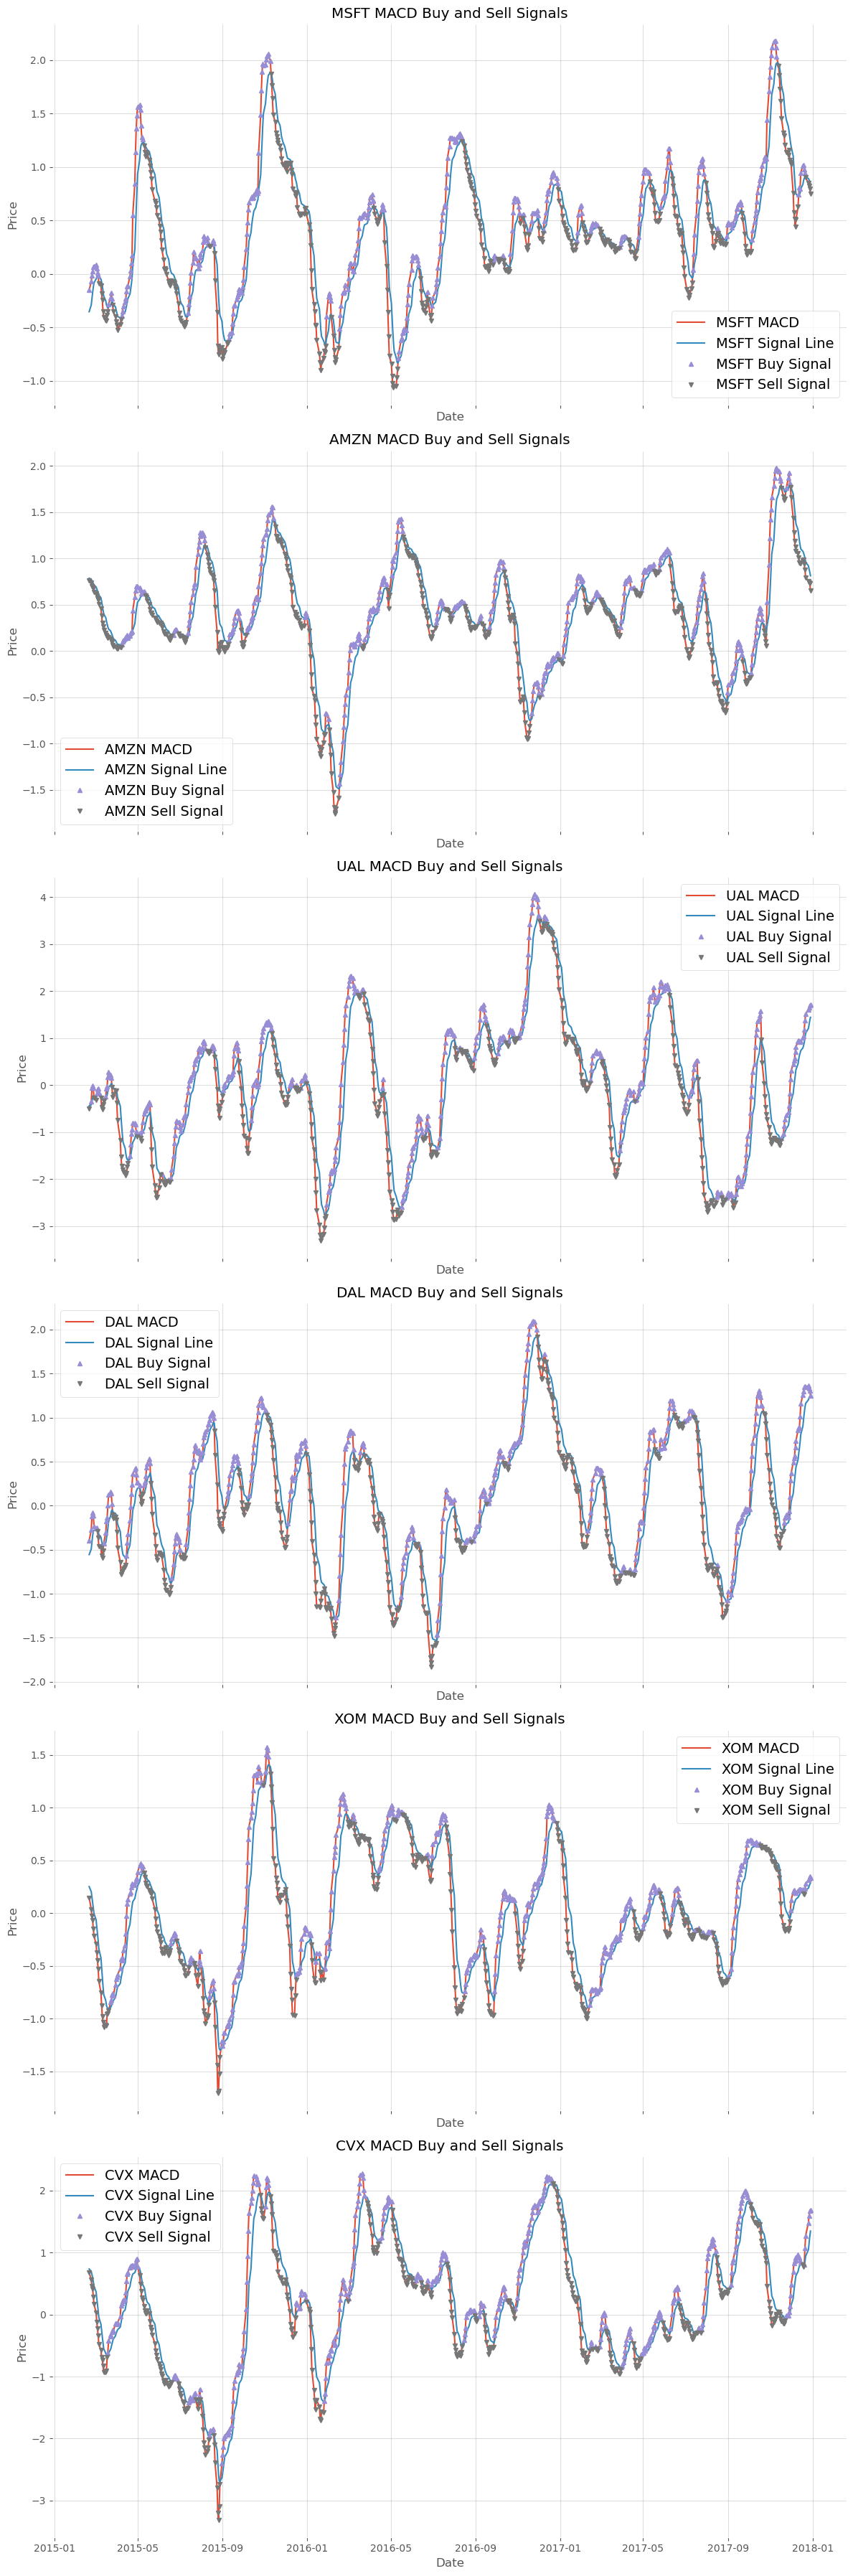

In [26]:
result = calculate_macd_for_symbols(stocks,start,end)
plot_macd_for_symbols(result)

###  <font color = blue> 👉 Question 7. </font> Which of the six stocks performs the best, based on cumulative returns?

### Below are the lines of code that lead to an answer:

In [27]:

def run_macd_strategy_for_symbols(symbols, start_date, end_date, starting_capital=100000, commission_fee=5):
    portfolio_data = {}  # Dictionary to store portfolio data for each symbol

    stock_data = calculate_macd_for_symbols(symbols, start_date, end_date)

    for symbol, data in stock_data.items():
        # Initialize variables for tracking capital and positions
        capital = starting_capital
        position = 0  # Number of shares held
        buy_price = None

        # Initialize lists to store dates, returns, and cumulative returns
        dates = []
        returns = []
        cumulative_returns = []

        for index, row in data.iterrows():  # Iterate through DataFrame rows
            if row["Signal"] == 1:
                # BUY SIGNAL
                if position == 0:
                    # Calculate the number of shares you can buy with available capital
                    shares_to_buy = (capital - commission_fee) // row['Adj Close']
                    if shares_to_buy > 0:
                        buy_price = row['Adj Close']
                        position += shares_to_buy
                        capital -= (shares_to_buy * buy_price) + commission_fee

            elif row['Signal'] == -1:
                # SELL SIGNAL
                if position > 0:
                    capital += (position * row['Adj Close']) - commission_fee
                    position = 0

            # Calculate current portfolio value
            portfolio_value = capital + (position * row['Adj Close'])

            # Append data to lists
            dates.append(index)
            returns.append(portfolio_value)
            cumulative_return = (portfolio_value - starting_capital) / starting_capital * 100
            cumulative_returns.append(cumulative_return)

        # Create a DataFrame to store the data
        portfolio_data[symbol] = pd.DataFrame({'Date': dates, 'Returns': returns, 'Cumulative_Returns': cumulative_returns})

    return portfolio_data

In [28]:
result = run_macd_strategy_for_symbols(stocks, start, end, starting_capital=100000, commission_fee=5)
result

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


{'MSFT':           Date        Returns  Cumulative_Returns
 0   2015-02-20   99995.000000           -0.005000
 1   2015-02-23  100656.076706            0.656077
 2   2015-02-24  100519.293629            0.519294
 3   2015-02-25  100291.335114            0.291335
 4   2015-02-26  100450.926991            0.450927
 ..         ...            ...                 ...
 717 2017-12-22  127150.133968           27.150134
 718 2017-12-26  127150.133968           27.150134
 719 2017-12-27  127150.133968           27.150134
 720 2017-12-28  127150.133968           27.150134
 721 2017-12-29  127150.133968           27.150134
 
 [722 rows x 3 columns],
 'AMZN':           Date        Returns  Cumulative_Returns
 0   2015-02-20  100000.000000            0.000000
 1   2015-02-23  100000.000000            0.000000
 2   2015-02-24  100000.000000            0.000000
 3   2015-02-25  100000.000000            0.000000
 4   2015-02-26  100000.000000            0.000000
 ..         ...            ...         

In [29]:
def plot_returns_for_symbols(symbol_portfolio_data_dict):
    for symbol, data in symbol_portfolio_data_dict.items():
        plt.figure(figsize=(12, 6))
        
        # Extract data for the symbol
        dates = data['Date']
        returns = data['Returns']
        
        # Plot the returns
        plt.plot(dates, returns, label=f'{symbol} Returns ($)')
        plt.xlabel('Date')
        plt.ylabel('Returns ($)')
        plt.title(f'Returns of MACD Crossover Strategy for {symbol}')
        plt.legend()
        plt.grid(True)
        plt.show()

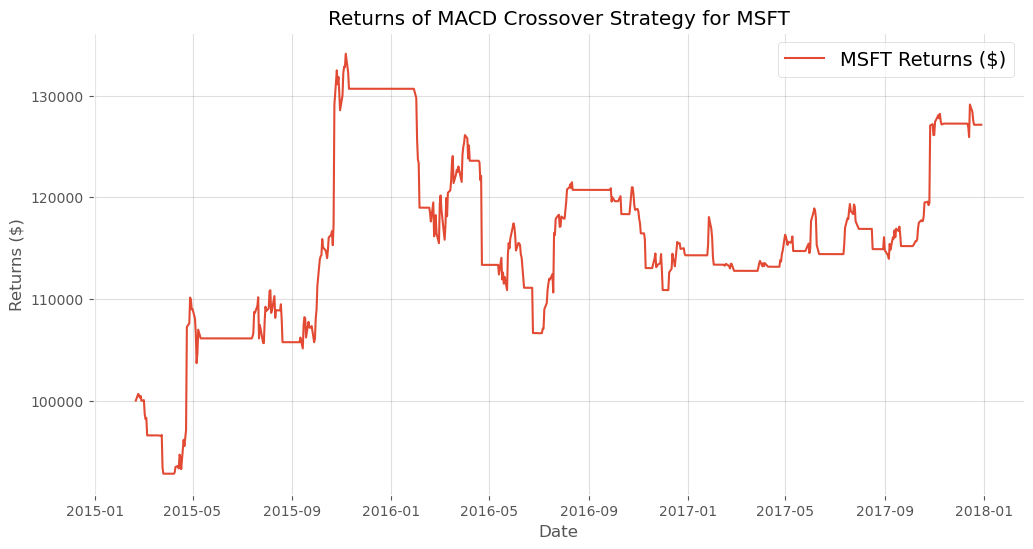

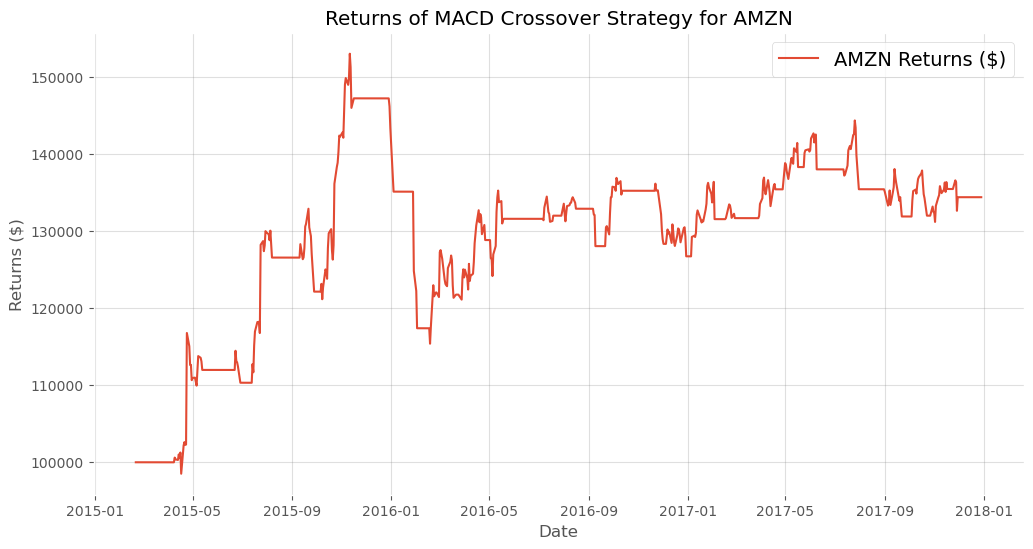

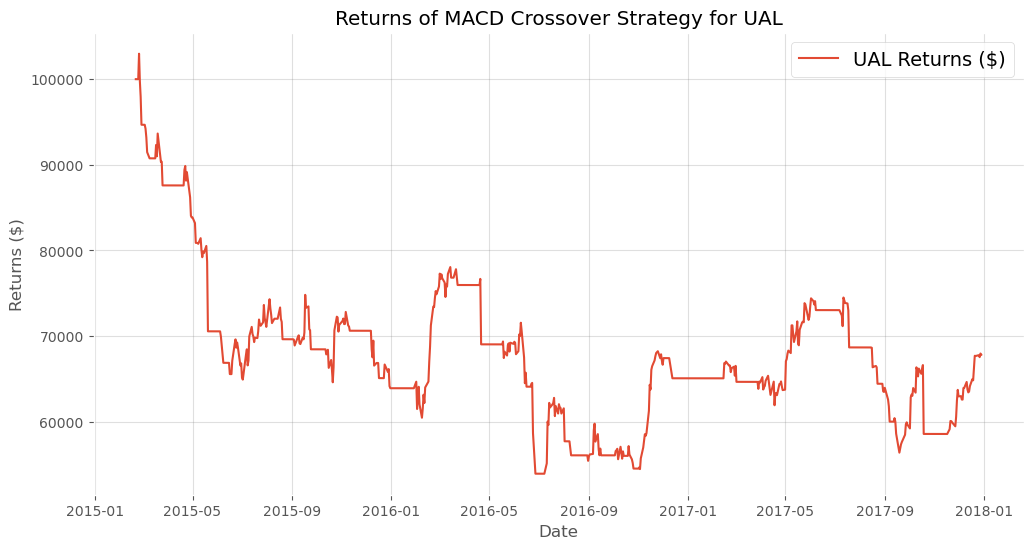

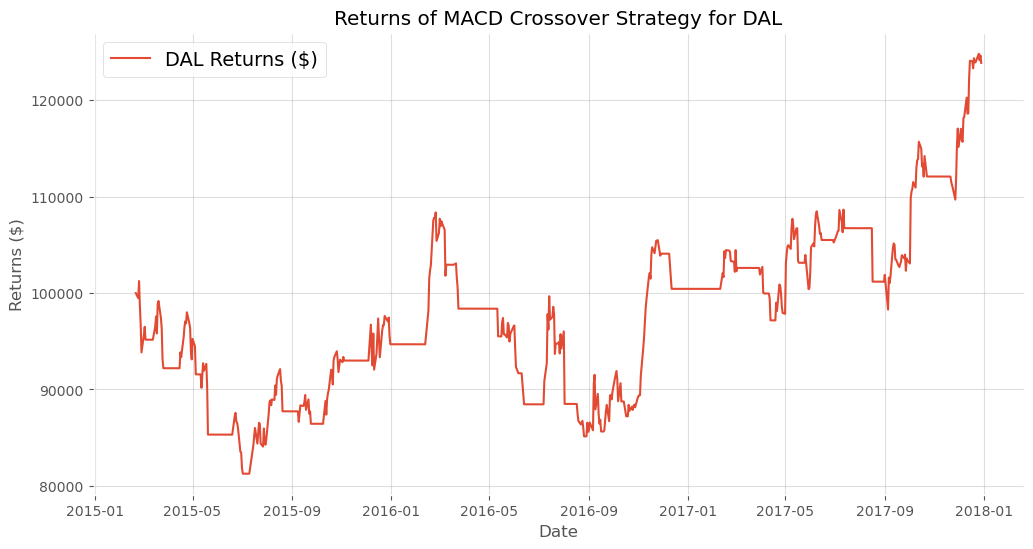

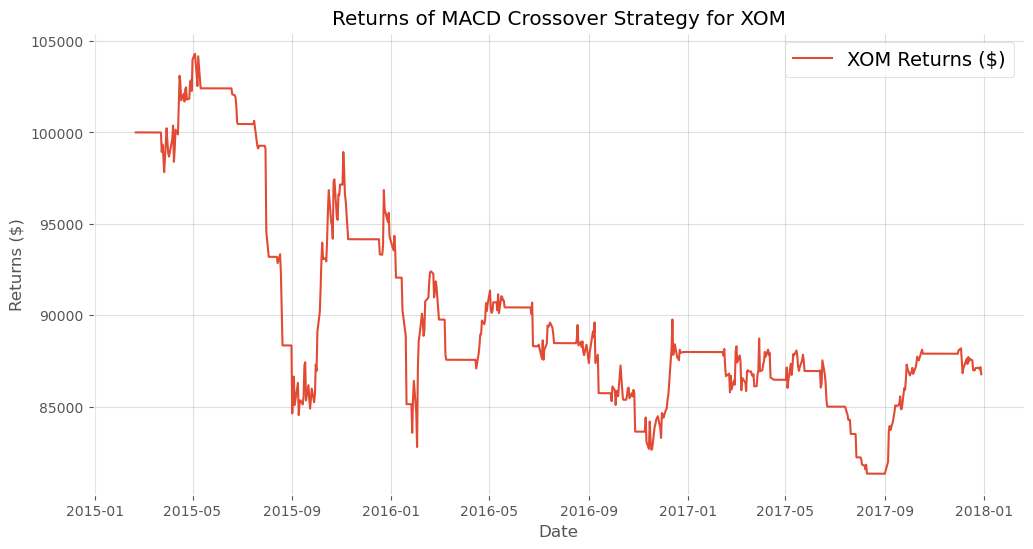

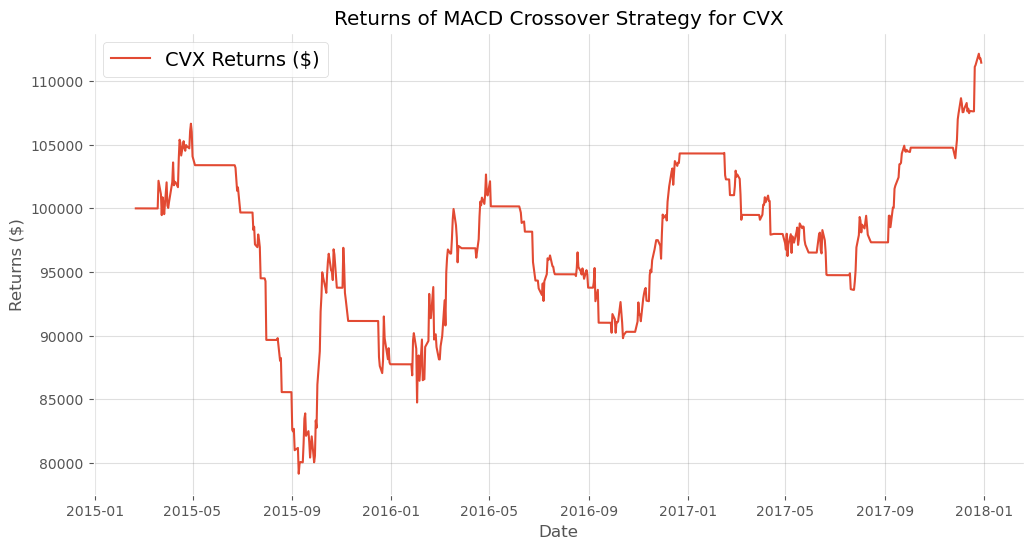

In [30]:
plot_returns_for_symbols(result)

### <font color = red> Answer 7 </font>

    The answer is _____________________AMZN_____________________ .

###  <font color = blue> 👉 Question 8. </font> Which of the stocks displays the worst max drawdown, based on net drawdown % and the number of days?

### Below are the lines of code that lead to an answer:

In [31]:
def add_results(stock_data):
    for symbol, data in stock_data.items():
        dates = data['Date']
        returns = data['Returns']

        # Create a DataFrame with date and return columns
        df = pd.DataFrame({'Date': dates, 'returns': returns})

        # Calculate maximum returns and drawdown
        df["MAX_returns"] = df["returns"].cummax()
        drawdown = (df["returns"] / df["MAX_returns"]) - 1
        df["drawdown"] = drawdown
        #Daily returns
        df['daily_returns']=df['returns']-df['returns'].shift(1)
        

        # Replace the original data with the updated DataFrame
        stock_data[symbol] = df
        
    return stock_data

In [32]:
add_results(result)

{'MSFT':           Date        returns    MAX_returns  drawdown  daily_returns
 0   2015-02-20   99995.000000   99995.000000  0.000000            NaN
 1   2015-02-23  100656.076706  100656.076706  0.000000     661.076706
 2   2015-02-24  100519.293629  100656.076706 -0.001359    -136.783077
 3   2015-02-25  100291.335114  100656.076706 -0.003624    -227.958515
 4   2015-02-26  100450.926991  100656.076706 -0.002038     159.591877
 ..         ...            ...            ...       ...            ...
 717 2017-12-22  127150.133968  134142.726139 -0.052128       9.850807
 718 2017-12-26  127150.133968  134142.726139 -0.052128       0.000000
 719 2017-12-27  127150.133968  134142.726139 -0.052128       0.000000
 720 2017-12-28  127150.133968  134142.726139 -0.052128       0.000000
 721 2017-12-29  127150.133968  134142.726139 -0.052128       0.000000
 
 [722 rows x 5 columns],
 'AMZN':           Date        returns    MAX_returns  drawdown  daily_returns
 0   2015-02-20  100000.000000  10

In [33]:

def calculate_drawdown_periods(stock_data):
    drawdowns_data = {}  # Dictionary to store drawdown data for each stock

    for symbol, data in stock_data.items():
        # Extract date and return data
        dates = data['Date']
        returns = data['returns']

        # Create a DataFrame with date and return columns
        df = pd.DataFrame({'Date': dates, 'returns': returns})

        # Calculate maximum returns and drawdown
        df["MAX_returns"] = df["returns"].cummax()
        drawdown = (df["returns"] / df["MAX_returns"]) - 1
        df["drawdown"] = drawdown

        drawdowns = []
        drawdown_periods = []
        start_date = None
        dd = 0

        for date, i in zip(df['Date'], df["drawdown"]):
            if i < 0:
                if start_date is None:
                    start_date = date
                    # Check for Monday
                    if start_date.weekday() == 0:
                        start_date = start_date - datetime.timedelta(days=3)
                    else:
                        start_date = start_date - datetime.timedelta(days=1)
                if i < dd:
                    dd = i
            elif i == 0:
                if start_date is not None:
                    end_date = date
                    drawdown_periods.append((end_date - start_date).days)
                    drawdowns.append(dd)
                    start_date = None
                    dd = 0

        if start_date is not None:
            end_date = df['Date'].iloc[-1]  # Use the last date in the data
            drawdown_periods.append((end_date - start_date).days)
            drawdowns.append(dd)

        # Store drawdown periods and values for the stock
        drawdowns_data[symbol] = {"periods": drawdown_periods, "values": drawdowns}

    return drawdowns_data


In [34]:
calculate_drawdown_periods(result)

{'MSFT': {'periods': [60, 84, 14, 58, 8, 2, 9, 2, 784],
  'values': [-0.07809204187080987,
   -0.05858100648724429,
   -0.04102083721248062,
   -0.051744447938758764,
   -0.016224939189020016,
   -0.01192991853649028,
   -0.02967258390525296,
   -0.0003674007298731796,
   -0.20518759036103928]},
 'AMZN': {'periods': [2, 5, 2, 4, 3, 84, 2, 2, 3, 6, 43, 32, 4, 2, 4, 779],
  'values': [-4.999999999999449e-05,
   -0.0030764120640059955,
   -0.0043101997090281285,
   -0.027145780893466198,
   -0.003527585572805414,
   -0.05841068419141515,
   -0.00020490107071879926,
   -0.012471490990151657,
   -0.01012312566810758,
   -0.009053574360345151,
   -0.028473481046476068,
   -0.08828889215056024,
   -0.001037227306766697,
   -0.004837253988295709,
   -0.005883337562607949,
   -0.24573122259484148]},
 'UAL': {'periods': [4, 1039],
  'values': [-4.999999999999449e-05, -0.47637946594272584]},
 'DAL': {'periods': [4, 358, 2, 470, 28, 5, 83, 4, 48, 7, 3, 5, 6, 3],
  'values': [-0.005267745572642424,

In [35]:
def plot_returns_and_max_returns(stock_data):
    for symbol, data in stock_data.items():
        dates = data['Date']
        returns = data['returns']
        max_returns = data['MAX_returns']

        plt.figure(figsize=(12, 6))
        plt.plot(dates, returns, label='Returns', color='blue')
        plt.plot(dates, max_returns, label='Max Returns', color='green')
        plt.xlabel('Date')
        plt.ylabel('Returns')
        plt.title(f'{symbol} Returns vs Max Returns')
        plt.legend()
        plt.grid(True)
        plt.show()

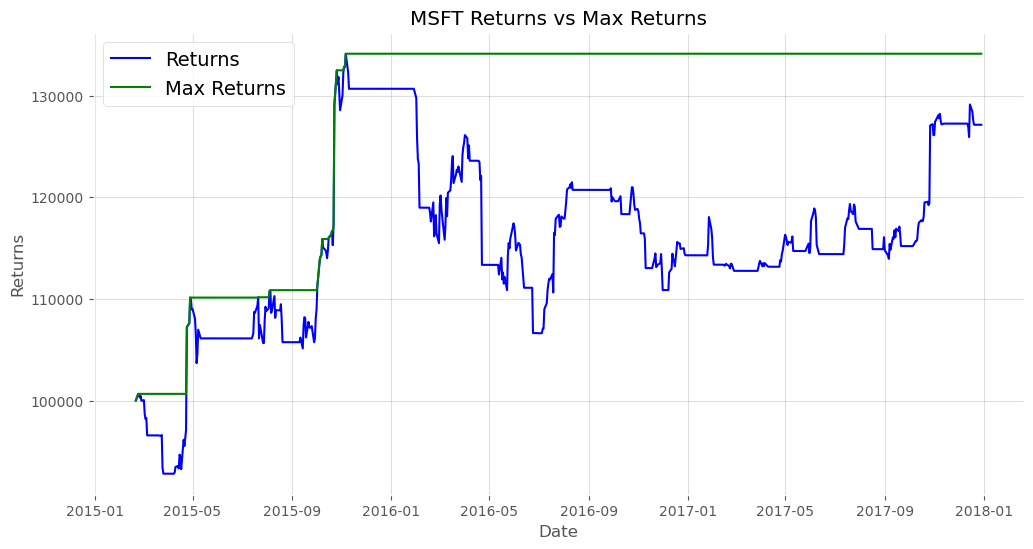

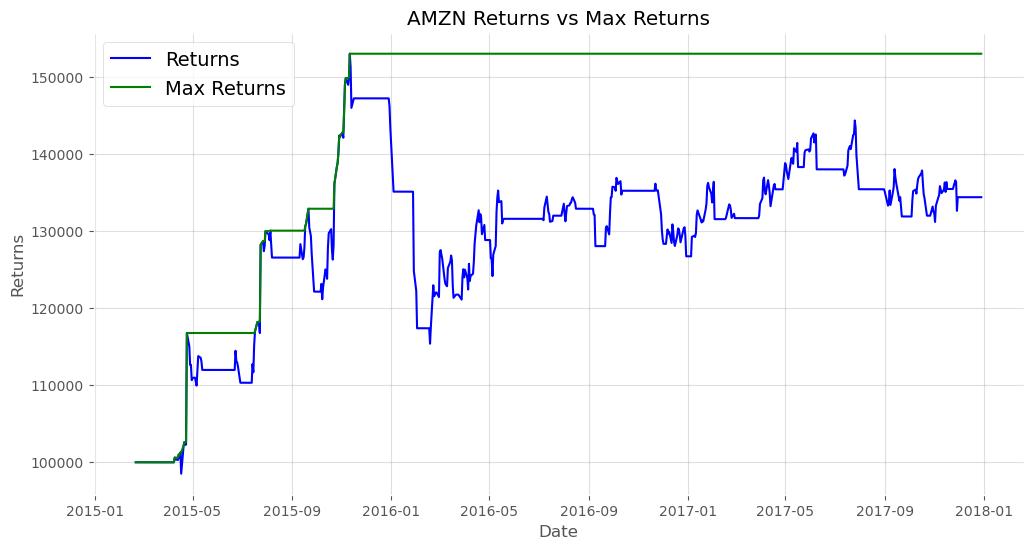

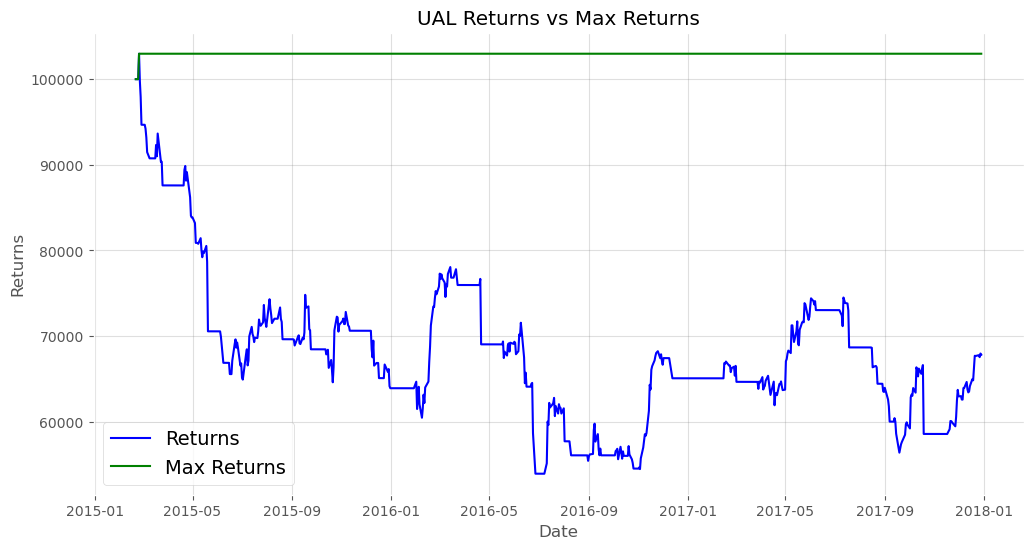

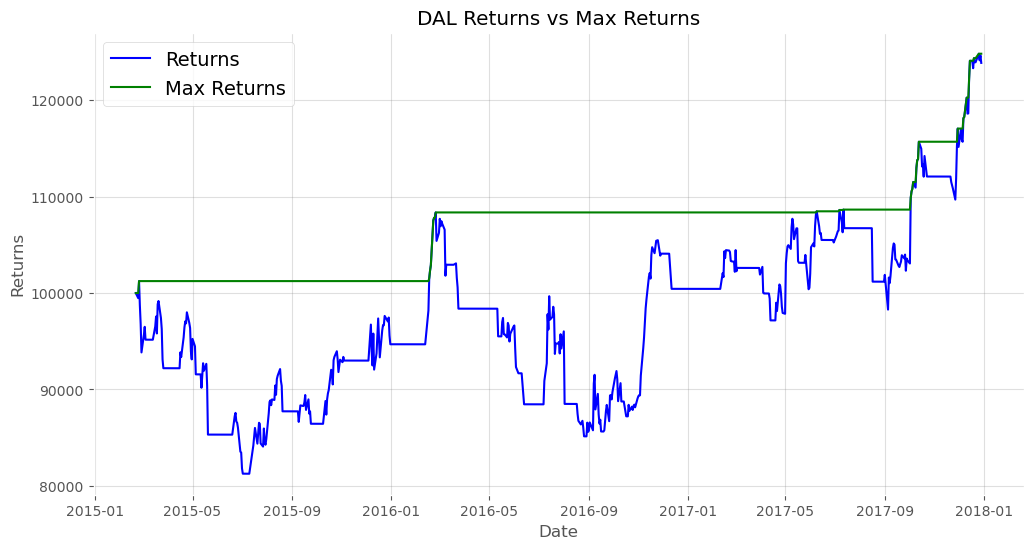

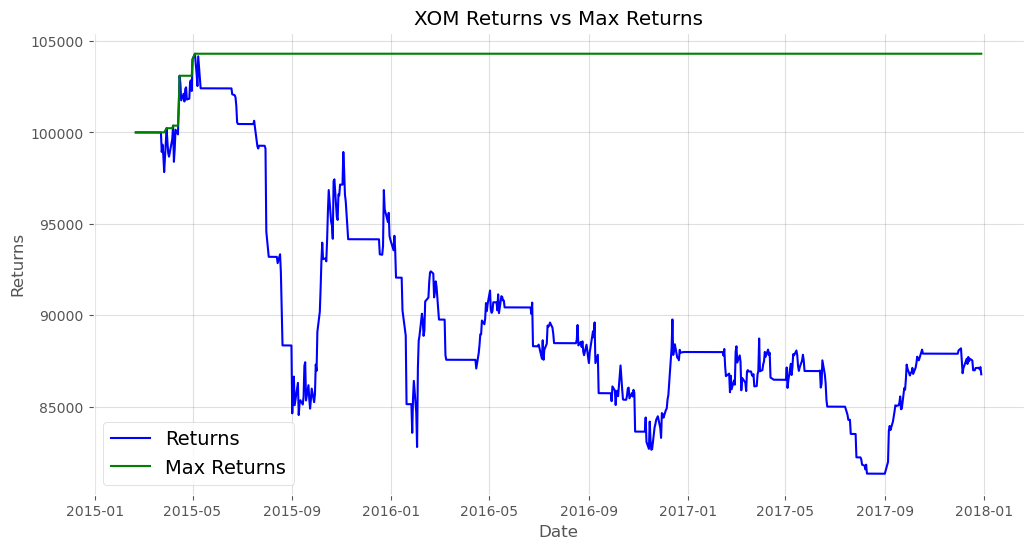

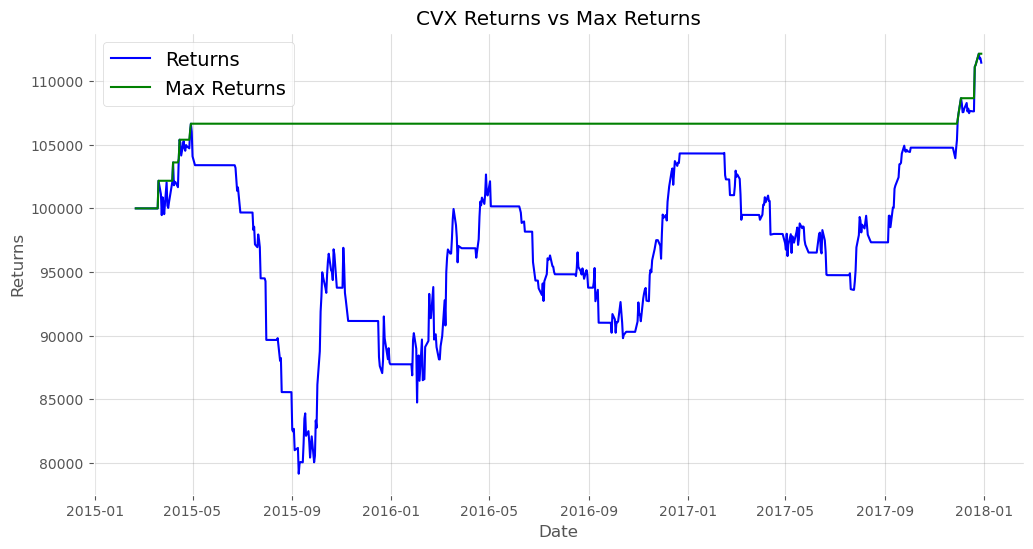

In [36]:
plot_returns_and_max_returns(result)

### <font color = red> Answer 8 </font>

    The answer is ___________________UAL_______________________ .

###  <font color = blue> 👉 Question 9. </font> Looking at each of the six stocks’ annual returns, which year for which stocks shows the best performance?

### Below are the lines of code that lead to an answer:

In [37]:
def calculate_annual_returns(stock_data):
    annual_returns_data = {}  # Dictionary to store annual returns for each stock

    for symbol, data in stock_data.items():
        dates = data['Date']
        returns = data['returns']

        # Create a DataFrame with date and return columns
        df = pd.DataFrame({'Date': dates, 'returns': returns})

        # Extract the year from the date index
        df['Year'] = df['Date'].dt.year

        # Calculate annual returns for each year
        annual_returns = (df.groupby('Year')['returns'].last() / df.groupby('Year')['returns'].first()) * 100

        # Calculate the average annual return
        average_annual_return = annual_returns.mean()

        # Determine which years performed better or worse than the average
        better_than_average_years = annual_returns[annual_returns > average_annual_return]
        worse_than_average_years = annual_returns[annual_returns < average_annual_return]

        # Store annual returns and comparison data for the stock
        annual_returns_data[symbol] = {
            'Annual Returns': annual_returns,
            'Average Annual Return': average_annual_return,
            'Better Than Average Years': better_than_average_years,
            'Worse Than Average Years': worse_than_average_years
        }

    return annual_returns_data

In [38]:
calculate_annual_returns(result)

{'MSFT': {'Annual Returns': Year
  2015    130.700879
  2016     87.457259
  2017    111.240816
  Name: returns, dtype: float64,
  'Average Annual Return': 109.79965139866869,
  'Better Than Average Years': Year
  2015    130.700879
  2017    111.240816
  Name: returns, dtype: float64,
  'Worse Than Average Years': Year
  2016    87.457259
  Name: returns, dtype: float64},
 'AMZN': {'Annual Returns': Year
  2015    143.330581
  2016     93.795290
  2017    106.046133
  Name: returns, dtype: float64,
  'Average Annual Return': 114.39066801754348,
  'Better Than Average Years': Year
  2015    143.330581
  Name: returns, dtype: float64,
  'Worse Than Average Years': Year
  2016     93.795290
  2017    106.046133
  Name: returns, dtype: float64},
 'UAL': {'Annual Returns': Year
  2015     63.904342
  2016    101.816520
  2017    104.226741
  Name: returns, dtype: float64,
  'Average Annual Return': 89.98253436544644,
  'Better Than Average Years': Year
  2016    101.816520
  2017    104.22

### <font color = red> Answer 9 </font>

    The answer is __________________AMZN 2015________________________ .

###  <font color = blue> 👉 Question 10. </font> Which of the six stocks make the current strategy investment performance? Please rank the seven stocks based on their annualized Sharpe ratio.

### Below are the lines of code that lead to an answer:

In [41]:
def calculate_annual_sharpe_ratio(stock_data):
    annual_sharpe_ratios = {}  # Dictionary to store annual Sharpe ratios for each stock

    for symbol, data in stock_data.items():
        dates = data['Date']
        daily_returns = data['daily_returns']

        # Create a DataFrame with date and return columns
        df = pd.DataFrame({'Date': dates, 'returns': returns})

#         # Extract the year from the date index
#         df['Year'] = df['Date'].dt.year

#         # Calculate annual returns for each year
#         annual_returns = (df.groupby('Year')['returns'].last() / df.groupby('Year')['returns'].first()) * 100

#         # Calculate annual Sharpe ratio
#         sharpe_ratio = (annual_returns / annual_returns.std()).mean()
        
    
        # Calculate annual Sharpe ratio
        sharpe_ratio = np.sqrt(253) * daily_returns.mean()/daily_returns.std()

        # Store the annual Sharpe ratio for the stock
        annual_sharpe_ratios[symbol] = sharpe_ratio

    return annual_sharpe_ratios

In [44]:
sharpe_port = calculate_annual_sharpe_ratio(result)
sharpe_port

{'MSFT': 0.5194817460376567,
 'AMZN': 0.5273216322963237,
 'UAL': -0.6241824088082614,
 'DAL': 0.4313800990527836,
 'XOM': -0.41776069896996115,
 'CVX': 0.2785947712079097}

In [45]:
sorted(sharpe_port)

['AMZN', 'CVX', 'DAL', 'MSFT', 'UAL', 'XOM']

### <font color = red> Answer 10 </font>

    MSFT ______4______
    
    AMZN ______1______

    UAL  ______5______

    DAL  _____3_______

    XOM  ______6______
    
    CVX  _____2_______

### <font color="green">"💯 Thank you for putting your efforts into the exercise problem sets 😊"</font>